<a href="https://colab.research.google.com/github/bunohoq/bigdata-1/blob/main/%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#글자깨짐 문제 수정을 위해 다음의 코드 실행 
#단계 1: 폰트 설치
import matplotlib.font_manager as fm
!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()


# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving subwayfee.csv to subwayfee (1).csv


In [ ]:
import pandas as pd

In [ ]:
subway_data = pd.read_csv('subwayfee.csv', thousands=',')
subway_data

UnicodeDecodeError: ignored

In [ ]:
subway_data.info()

NameError: ignored

In [ ]:
subway_data.describe()

,역ID,유임승차,유임하차,무임승차,무임하차
count,615.000000,6.150000e+02,6.150000e+02,615.000000,615.000000
mean,1925.426016,2.743329e+05,2.736899e+05,59123.193496,58486.723577
std,1206.046422,2.754089e+05,2.814336e+05,48832.818329,48478.343749
min,150.000000,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,1203.500000,9.269750e+04,8.808850e+04,23992.000000,24146.000000
50%,1823.000000,2.029260e+05,1.897940e+05,47113.000000,45468.000000
75%,2635.500000,3.605525e+05,3.680550e+05,76208.500000,75311.500000
max,4713.000000,2.190921e+06,2.159810e+06,319982.000000,309026.000000


In [ ]:
print(subway_data['유임승차']/ subway_data['무임승차'])
print('')
print(subway_data['유임승차']/ (subway_data['유임승차'] + subway_data['무임승차']))

0      5.983413
1      5.342354
2      5.807195
3      1.560628
4      1.697722
         ...   
610    2.733478
611    2.349254
612    3.291951
613    2.973778
614    1.578036
Length: 615, dtype: float64

0      0.856804
1      0.842330
2      0.853097
3      0.609471
4      0.629317
         ...   
610    0.732153
611    0.701426
612    0.767006
613    0.748350
614    0.612108
Length: 615, dtype: float64


In [ ]:
(subway_data['유임승차']/ subway_data['무임승차']).max()

inf

In [ ]:
(subway_data['유임승차']/ (subway_data['유임승차'] + subway_data['무임승차'])).max()

1.0

In [ ]:
rate_table = pd.DataFrame(subway_data['유임승차']/ (subway_data['유임승차'] + subway_data['무임승차']), columns = ['rate'])
rate_table

,rate
0,0.856804
1,0.842330
2,0.853097
3,0.609471
4,0.629317
...,...
610,0.732153
611,0.701426
612,0.767006
613,0.748350


In [ ]:
added_subway = pd.concat([subway_data, rate_table], axis = 1)
added_subway

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,rate
0,2022-10,1호선,150,서울역,1307627,1279921,218542,210320,2022-11-03 10:23:08,0.856804
1,2022-10,1호선,151,시청,638454,654541,119508,116903,2022-11-03 10:23:08,0.842330
2,2022-10,1호선,152,종각,893135,864755,153798,143813,2022-11-03 10:23:08,0.853097
3,2022-10,1호선,153,종로3가,499373,442702,319982,296084,2022-11-03 10:23:08,0.609471
4,2022-10,1호선,154,종로5가,442041,447014,260373,250139,2022-11-03 10:23:08,0.629317
...,...,...,...,...,...,...,...,...,...,...
610,2022-10,신림선,4407,당곡,81731,77226,29900,29421,2022-11-03 10:23:08,0.732153
611,2022-10,신림선,4408,신림,32906,47581,14007,16623,2022-11-03 10:23:08,0.701426
612,2022-10,신림선,4409,서원,67113,53390,20387,20283,2022-11-03 10:23:08,0.767006
613,2022-10,신림선,4410,서울대벤처타운,163418,153554,54953,55830,2022-11-03 10:23:08,0.748350


In [ ]:
added_subway['총이용객']=added_subway.loc[:, ['유임승차','유임하차', '무임승차', '무임하차']].sum(axis = 1)
added_subway

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,rate,총이용객
0,2022-10,1호선,150,서울역,1307627,1279921,218542,210320,2022-11-03 10:23:08,0.856804,3016410
1,2022-10,1호선,151,시청,638454,654541,119508,116903,2022-11-03 10:23:08,0.842330,1529406
2,2022-10,1호선,152,종각,893135,864755,153798,143813,2022-11-03 10:23:08,0.853097,2055501
3,2022-10,1호선,153,종로3가,499373,442702,319982,296084,2022-11-03 10:23:08,0.609471,1558141
4,2022-10,1호선,154,종로5가,442041,447014,260373,250139,2022-11-03 10:23:08,0.629317,1399567
...,...,...,...,...,...,...,...,...,...,...,...
610,2022-10,신림선,4407,당곡,81731,77226,29900,29421,2022-11-03 10:23:08,0.732153,218278
611,2022-10,신림선,4408,신림,32906,47581,14007,16623,2022-11-03 10:23:08,0.701426,111117
612,2022-10,신림선,4409,서원,67113,53390,20387,20283,2022-11-03 10:23:08,0.767006,161173
613,2022-10,신림선,4410,서울대벤처타운,163418,153554,54953,55830,2022-11-03 10:23:08,0.748350,427755


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data=added_subway[['유임승차','유임승차','무임승차','무임하차']].corr(), square=True, annot=True, cmap='bone')
plt.show()

NameError: ignored

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
res = ols('rate ~ 총이용객', data=added_subway).fit()

In [ ]:
res.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f33fe3d7c90>>

In [ ]:
import numpy as np
added_subway['loguser']=np.log(added_subway['총이용객'])
added_subway

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,rate,총이용객,losuser,loguser
0,2022-10,1호선,150,서울역,1307627,1279921,218542,210320,2022-11-03 10:23:08,0.856804,3016410,14.919578,14.919578
1,2022-10,1호선,151,시청,638454,654541,119508,116903,2022-11-03 10:23:08,0.842330,1529406,14.240390,14.240390
2,2022-10,1호선,152,종각,893135,864755,153798,143813,2022-11-03 10:23:08,0.853097,2055501,14.536030,14.536030
3,2022-10,1호선,153,종로3가,499373,442702,319982,296084,2022-11-03 10:23:08,0.609471,1558141,14.259004,14.259004
4,2022-10,1호선,154,종로5가,442041,447014,260373,250139,2022-11-03 10:23:08,0.629317,1399567,14.151673,14.151673
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,2022-10,신림선,4407,당곡,81731,77226,29900,29421,2022-11-03 10:23:08,0.732153,218278,12.293525,12.293525
611,2022-10,신림선,4408,신림,32906,47581,14007,16623,2022-11-03 10:23:08,0.701426,111117,11.618339,11.618339
612,2022-10,신림선,4409,서원,67113,53390,20387,20283,2022-11-03 10:23:08,0.767006,161173,11.990234,11.990234
613,2022-10,신림선,4410,서울대벤처타운,163418,153554,54953,55830,2022-11-03 10:23:08,0.748350,427755,12.966306,12.966306


In [ ]:
res = ols('rate ~ loguser', data=added_subway).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6918
Date:                Thu, 17 Nov 2022   Prob (F-statistic):              0.406
Time:                        11:24:07   Log-Likelihood:                 593.51
No. Observations:                 615   AIC:                            -1183.
Df Residuals:                     613   BIC:                            -1174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7740      0.026     30.330      0.000       0.724       0.824
loguser        0.0016      0.002      0.832      0.406      -0.002       0.006
==============================================================================
Omnibus:                      113.802   Durbin-Watson:                   0.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.353
Skew:                          -0.995   Prob(JB):                     1.59e-55
Kurtosis:                       5.427   Cond. No.                         89.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

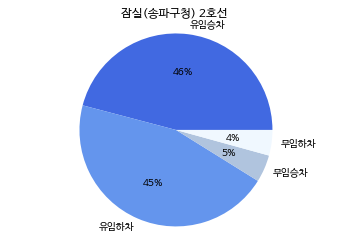

In [ ]:
import matplotlib.pyplot as plt

label = ['유임승차', '유임하차', '무임승차', '무임하차']
c = ['royalblue','cornflowerblue','lightsteelblue','aliceblue']
size=[2190921,2159810,218589,204196]

plt.title('잠실(송파구청) 2호선')

plt.pie(size, labels=label, colors=c, autopct='%1.f%%')
plt.axis('equal')
plt.show()